In [2]:
import os
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from keras.models import load_model
import pandas as pd
import random
import warnings
warnings.filterwarnings("ignore")
from PIL import Image, ImageEnhance

In [3]:
# Load the saved model
model = load_model(r'C:\Users\bhati\PycharmProjects\WasteManagement\best_inceptionresnetv2_model.h5')

In [4]:
# Load the test data
test_dir = r'C:\Users\bhati\DATA298-FinalProject\Removed_Duplicates\train_val_test\test'

In [5]:
# Image size and batch size
image_size = (299, 299)
batch_size = 32

In [6]:
# Create a test data generator
test_datagen = ImageDataGenerator(preprocessing_function=keras.applications.inception_resnet_v2.preprocess_input)
test_generator = test_datagen.flow_from_directory(
    test_dir, target_size=image_size, batch_size=batch_size, class_mode='categorical', shuffle=False
)

Found 2001 images belonging to 11 classes.


In [7]:
# Predictions and classification report
test_generator.reset()
predictions = model.predict(test_generator)
predicted_classes = np.argmax(predictions, axis=1)
true_classes = test_generator.classes
class_labels = list(test_generator.class_indices.keys())

63/63 [==============================] - 170s 3s/step


In [14]:
num_classes = len(class_labels)
num_rows = 6
num_columns = 2


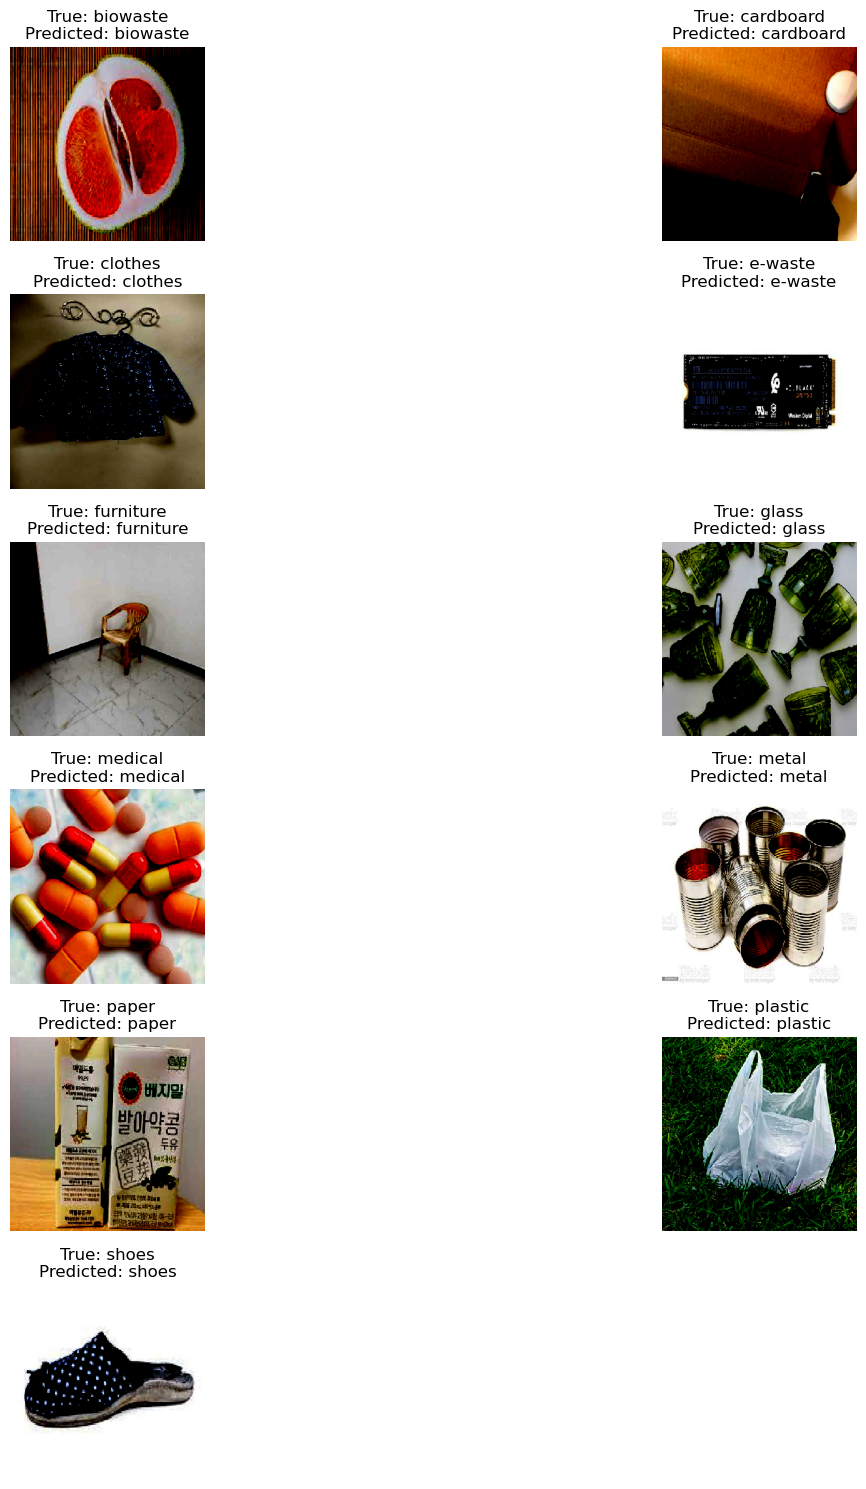

In [15]:
# Increase figure size to accommodate more subplots
plt.figure(figsize=(15, 15))

for class_name in class_labels:
    # Get the first image from the current class folder
    class_images = [filename for filename in test_generator.filenames if class_name in filename]
    
    if class_images:  # Check if there are images in the current class
        first_image = class_images[0]
        img_path = os.path.join(test_dir, first_image)

        # Load and preprocess the image
        img = load_img(img_path, target_size=image_size)
        img_array = img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array = keras.applications.inception_resnet_v2.preprocess_input(img_array)

        # Get true and predicted labels
        true_label = class_labels[true_classes[test_generator.filenames.index(first_image)]]
        predicted_label = class_labels[predicted_classes[test_generator.filenames.index(first_image)]]

        # Determine subplot position dynamically
        subplot_position = class_labels.index(class_name) + 1

        # Display the image and labels
        plt.subplot(num_rows, num_columns, subplot_position)
        img_array[0] = img_array[0] / np.amax(img_array[0])
        img_array[0] = np.clip(img_array[0], 0, 1)
        plt.imshow(img_array[0])
        plt.title(f'True: {true_label}\nPredicted: {predicted_label}')
        plt.axis('off')

plt.tight_layout()  # Adjust layout for better spacing
plt.show()